In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_data(filename="parallel.csv",
            data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/",
            split_realiz=False):
    data = pd.read_csv(data_dir + filename, sep=";").to_numpy() # .groupby("realization")
    if not split_realiz:
        return data
    #print(data)
    #print(f"Shape = {data.shape}, Coulomns = [Realization, Time, v_x_sq, v_y_sq, v_z_sq]")
    #print(f"Number of realizations = {data[-1,0]}")
    
    iterations = len(np.unique(data[:,0]))
    data = np.array([data[data[:,0]==i] for i in range(iterations)]) # contains shape=(realizations, it/re, values)
    #print(f"Reshaped = {data.shape}\n")
    return data

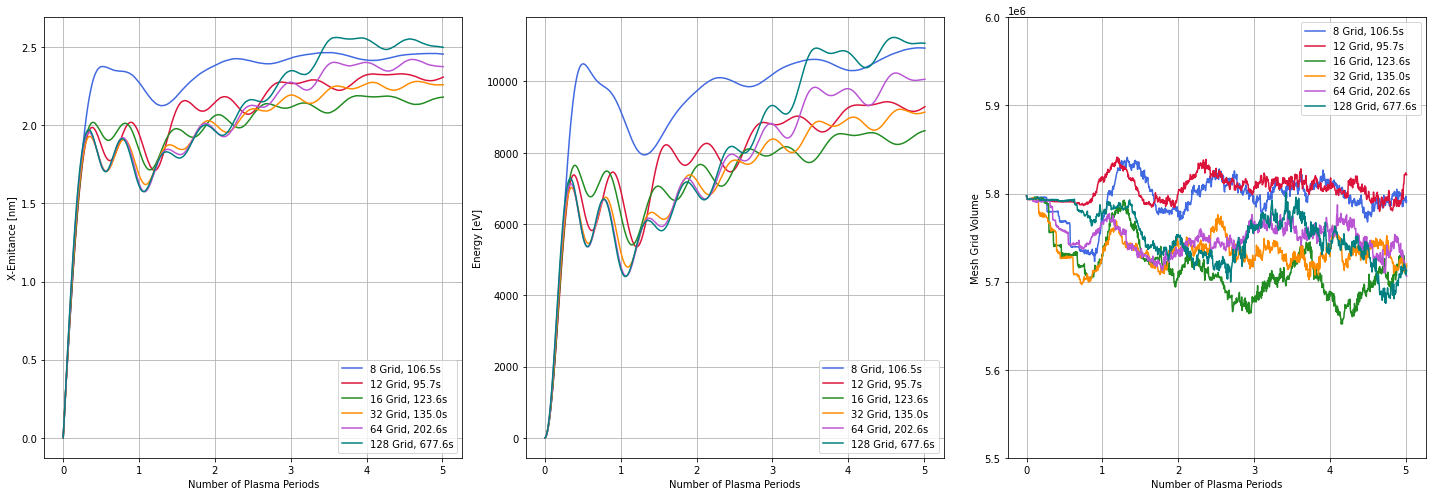

[ 0.00000000e+00 -4.62959761e+10  4.62959761e+10  1.54319920e+10
 -1.54319920e+10  3.08639841e+10 -3.08639841e+10  6.17279681e+10]


In [2]:
file_info = [
    ("1722065546298_Nanbu_sphere.csv", "8 Grid, 106.5s", "royalblue"),
    ("1722066177692_Nanbu_sphere.csv", "12 Grid, 95.7s", "crimson"),
    ("1722065549397_Nanbu_sphere.csv", "16 Grid, 123.6s", "forestgreen"),
    ("1722065552042_Nanbu_sphere.csv", "32 Grid, 135.0s", "darkorange"),
    ("1722065609787_Nanbu_sphere.csv", "64 Grid, 202.6s", "mediumorchid"),
    ("1722065867030_Nanbu_sphere.csv", "128 Grid, 677.6s", "teal"),
    #("1722067478530_Nanbu_sphere.csv", "add", "darkslategray"),
    #("1722060863734_Nanbu_sphere.csv", "32 rid", "teal"),
    #("1722065184014_Nanbu_sphere.csv", "64 Grid", "goldenrod"),
    #("1722065264780_Nanbu_sphere.csv", "96 Grid, 1448s", "darkslategray"),
   # ("1722065264780_Nanbu_sphere.csv", "128 Grid", "brown")
]


#data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/"
data_dir = "data/sphere/"


# plt.figure(figsize=(10,8))
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

for path, label, color in file_info:
    data = get_data(data_dir=data_dir, filename=path)
    
    #datax_exmit = np.genfromtxt(Xpath, delimiter=' ')
    #data_energy = np.genfromtxt(Epath, delimiter=' ')

    #timearr = datax_exmit[:,2] * 2.15623e-13
    #exemit  = datax_exmit[:,3] #* 1e3
    #energy  = data_energy[:,3] #* 1e9
    time = data[:,1]*6.582e-16/4.31e-11 # convert back from natural units!
    ax1.plot(time, data[:,6]*1.973e-7*1e9, label=label, color=color)
    ax2.plot(time, data[:,2], label=label, color=color)
    ax3.plot(time, data[:,7], label=label, color=color)
# - $64^3$ Grid, 160k Particles, $\\Delta t = 2.15 \\cdot 10^{-13}\,\\mathrm{s}$, 1000 Steps
ax1.set_xlabel('Number of Plasma Periods')
ax1.set_ylabel('X-Emitance [nm]')
#ax1.set_title('X-Emitance vs. Time')

ax2.set_xlabel('Number of Plasma Periods')
ax2.set_ylabel('Energy [eV]')
#ax2.set_title('Energy vs. Time')

ax3.set_xlabel('Number of Plasma Periods')
ax3.set_ylabel('Mesh Grid Volume')
#ax3.set_title('Mesh Grid Volume vs. Time')


ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.legend(loc="best")
ax2.legend(loc="best")
ax3.legend(loc="best")
ax3.set_ylim((5.5e6, 6.0e6))

plt.tight_layout()
plt.savefig("plots/cold_sphere_grid_comparison.pdf")
plt.show()



data  = get_data(data_dir=data_dir, filename=file_info[-1][0])
time  = data[:300,1]*6.582e-16 # /4.31e-11
xemit = data[:300,2]*1.973e-7*1e9
# Perform the Discrete Fourier Transform (FFT)
Y = np.fft.fft(xemit)

# Compute the frequencies corresponding to the FFT results
N = len(xemit)  # Number of samples
frequencies = np.fft.fftfreq(N, d=(time[1] - time[0]))  # Frequency bins
#plt.plot(frequencies, np.abs(Y))  # Plot only the positive frequencies
print(frequencies[np.flip(np.abs(Y).argsort())][:8])
#plt.title('Magnitude of the FFT')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Magnitude')
#plt.grid(True)

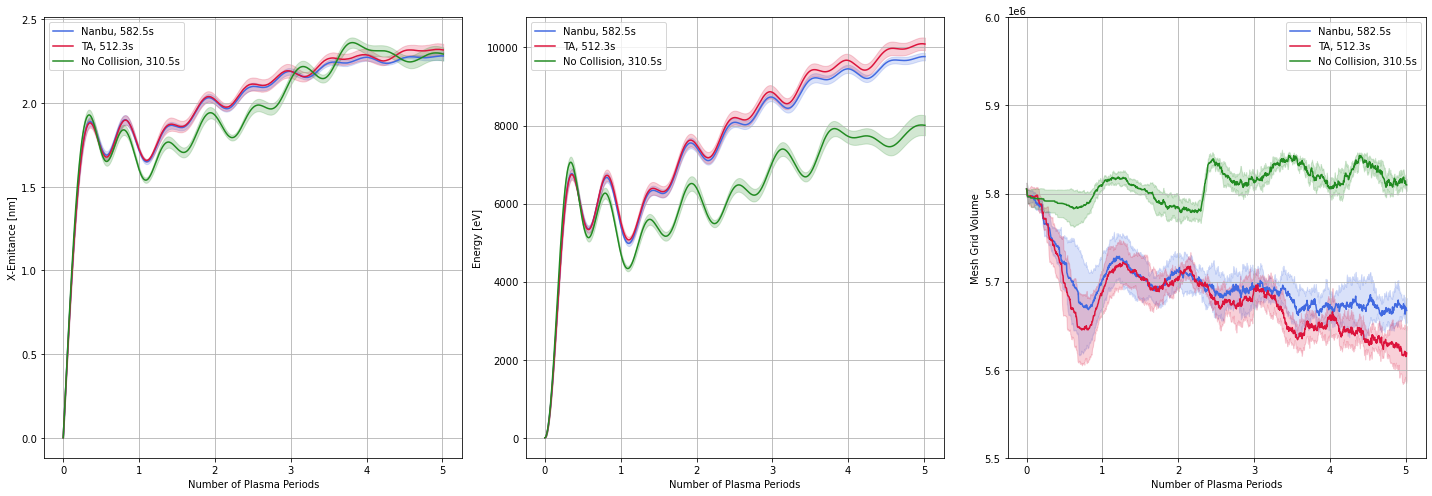

In [3]:
file_info = [
    ("1722070085305_Nanbu_sphere.csv", "Nanbu, 582.5s", "royalblue"),
    ("1722070052340_TakAbe_sphere.csv", "TA, 512.3s", "crimson"),
    ("1722070028194_Nanbu_sphere.csv", "No Collision, 310.5s", "forestgreen")
    #"1722065552042_Nanbu_sphere.csv", "32 Grid, 135.0s", "darkorange"),
    #("1722065609787_Nanbu_sphere.csv", "64 Grid, 202.6s", "mediumorchid"),
    #("1722065867030_Nanbu_sphere.csv", "128 Grid, 677.6s", "teal"),
    #("1722067478530_Nanbu_sphere.csv", "add", "darkslategray"),
    #("1722060863734_Nanbu_sphere.csv", "32 rid", "teal"),
    #("1722065184014_Nanbu_sphere.csv", "64 Grid", "goldenrod"),
    #("1722065264780_Nanbu_sphere.csv", "96 Grid, 1448s", "darkslategray"),
   # ("1722065264780_Nanbu_sphere.csv", "128 Grid", "brown")
]


#data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/"
data_dir = "data/sphere/"


# Assuming file_info is defined and get_data is a function that retrieves the data
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

for path, label, color in file_info:
    data = get_data(data_dir=data_dir, filename=path, split_realiz=True)
    
    # Convert time from natural units
    time = data[0,:,1] * 6.582e-16 / 4.31e-11  # Convert back from natural units!

    # Calculate mean and standard deviation across realizations
    x_emitance_mean = np.mean(data[:, :, 6] * 1.973e-7 * 1e9, axis=0)
    x_emitance_std = np.std(data[:, :, 6] * 1.973e-7 * 1e9, axis=0)

    energy_mean = np.mean(data[:, :, 2], axis=0)
    energy_std = np.std(data[:, :, 2], axis=0)

    mesh_volume_mean = np.mean(data[:, :, 7], axis=0)
    mesh_volume_std = np.std(data[:, :, 7], axis=0)

    # Plot X-Emitance with shaded standard deviation
    ax1.plot(time, x_emitance_mean, label=label, color=color)
    ax1.fill_between(time, x_emitance_mean - x_emitance_std, x_emitance_mean + x_emitance_std, color=color, alpha=0.2)

    # Plot Energy with shaded standard deviation
    ax2.plot(time, energy_mean, label=label, color=color)
    ax2.fill_between(time, energy_mean - energy_std, energy_mean + energy_std, color=color, alpha=0.2)

    # Plot Mesh Grid Volume with shaded standard deviation
    ax3.plot(time, mesh_volume_mean, label=label, color=color)
    ax3.fill_between(time, mesh_volume_mean - mesh_volume_std, mesh_volume_mean + mesh_volume_std, color=color, alpha=0.2)

# Set labels and titles
ax1.set_xlabel('Number of Plasma Periods')
ax1.set_ylabel('X-Emitance [nm]')
#ax1.set_title('X-Emitance vs. Time')

ax2.set_xlabel('Number of Plasma Periods')
ax2.set_ylabel('Energy [eV]')
#ax2.set_title('Energy vs. Time')

ax3.set_xlabel('Number of Plasma Periods')
ax3.set_ylabel('Mesh Grid Volume')
#ax3.set_title('Mesh Grid Volume vs. Time')

# Enable grid and legends
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.legend(loc="best")
ax2.legend(loc="best")
ax3.legend(loc="best")
ax3.set_ylim((5.5e6, 6.0e6))

plt.tight_layout()
plt.savefig("plots/cold_sphere_collision_algo_comparison.pdf")
plt.show()

The following is just some unimportant testing...

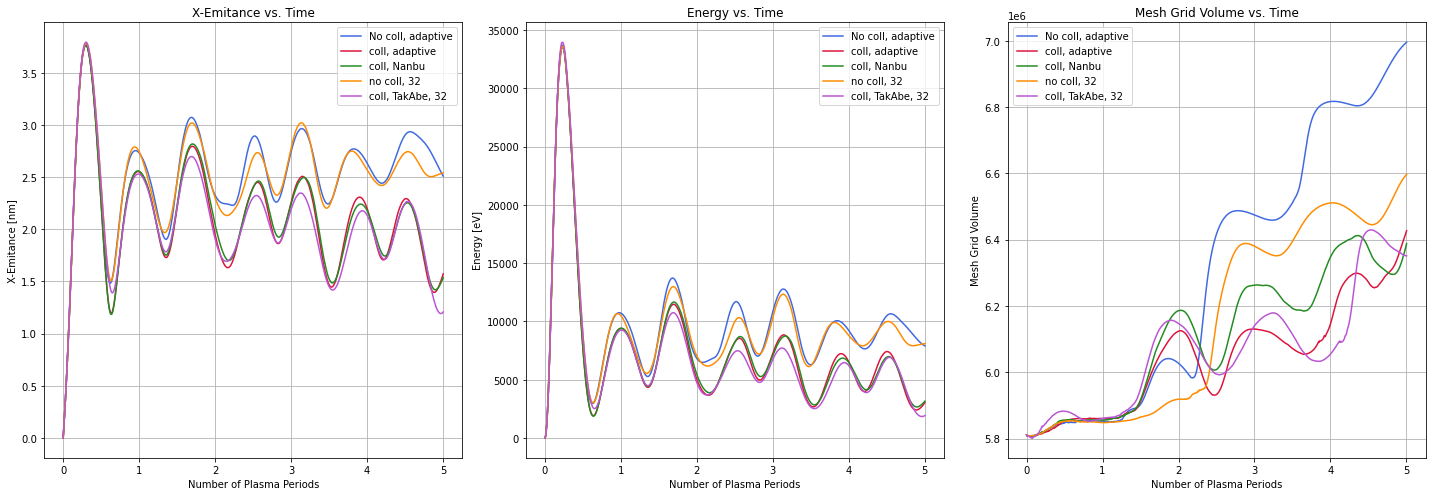

[ 0.         -1.33257273  1.33257273  0.66628637 -0.66628637  1.9988591
 -1.9988591   2.66514546]


In [201]:
file_info = [
    ("1722345314081_TakAbe_sphere.csv", "No coll, adaptive", "royalblue"),
    ("1722345424443_TakAbe_sphere.csv", "coll, adaptive", "crimson"),
    ("1722345575736_Nanbu_sphere.csv", "coll, Nanbu", "forestgreen"),
    ("1722345852247_TakAbe_sphere.csv", "no coll, 32", "darkorange"),
    ("1722345921267_TakAbe_sphere.csv", "coll, TakAbe, 32", "mediumorchid"),
    #("1722065867030_Nanbu_sphere.csv", "128 Grid, 677.6s", "teal"),
    #("1722067478530_Nanbu_sphere.csv", "add", "darkslategray"),
    #("1722060863734_Nanbu_sphere.csv", "32 rid", "teal"),
    #("1722065184014_Nanbu_sphere.csv", "64 Grid", "goldenrod"),
    #("1722065264780_Nanbu_sphere.csv", "96 Grid, 1448s", "darkslategray"),
   # ("1722065264780_Nanbu_sphere.csv", "128 Grid", "brown")
]


data_dir = "//wsl.localhost/Ubuntu/home/aliemen/IPPLBUILD/ippl_build/ippl/build_serial/05.03.dsmc/dsmc-code-simple/data/"
#data_dir = "data/sphere/"


# plt.figure(figsize=(10,8))
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

for path, label, color in file_info:
    data = get_data(data_dir=data_dir, filename=path)
    
    #datax_exmit = np.genfromtxt(Xpath, delimiter=' ')
    #data_energy = np.genfromtxt(Epath, delimiter=' ')

    #timearr = datax_exmit[:,2] * 2.15623e-13
    #exemit  = datax_exmit[:,3] #* 1e3
    #energy  = data_energy[:,3] #* 1e9
    time = data[:,1]*6.582e-16/4.31e-11 # convert back from natural units!
    ax1.plot(time, data[:,6]*1.973e-7*1e9, label=label, color=color)
    ax2.plot(time, data[:,2], label=label, color=color)
    ax3.plot(time, data[:,7], label=label, color=color)
# - $64^3$ Grid, 160k Particles, $\\Delta t = 2.15 \\cdot 10^{-13}\,\\mathrm{s}$, 1000 Steps
ax1.set_xlabel('Number of Plasma Periods')
ax1.set_ylabel('X-Emitance [nm]')
ax1.set_title('X-Emitance vs. Time')

ax2.set_xlabel('Number of Plasma Periods')
ax2.set_ylabel('Energy [eV]')
ax2.set_title('Energy vs. Time')

ax3.set_xlabel('Number of Plasma Periods')
ax3.set_ylabel('Mesh Grid Volume')
ax3.set_title('Mesh Grid Volume vs. Time')
#ax3.plot([0, 5.0], [1.3e8, 1.3e8], "--", alpha=1.0, color="grey")


ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.legend(loc="best")
ax2.legend(loc="best")
ax3.legend(loc="best")
#ax3.set_ylim((5.5e6, 6.0e6))

plt.tight_layout()
#plt.savefig("plots/cold_sphere_grid_comparison.pdf")
plt.show()



data  = get_data(data_dir=data_dir, filename=file_info[-1][0])
time  = data[:300,1]*6.582e-16 # /4.31e-11
xemit = data[:300,2]*1.973e-7*1e9
# Perform the Discrete Fourier Transform (FFT)
Y = np.fft.fft(xemit)

# Compute the frequencies corresponding to the FFT results
N = len(xemit)  # Number of samples
frequencies = np.fft.fftfreq(N, d=(time[1] - time[0]))  # Frequency bins
#plt.plot(frequencies, np.abs(Y))  # Plot only the positive frequencies
print(frequencies[np.flip(np.abs(Y).argsort())][:8]*4.31e-11)
#plt.title('Magnitude of the FFT')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Magnitude')
#plt.grid(True)